In [1]:
import pyproj
import shapely
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import fiona
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

### Debug

 - https://gist.github.com/mazzma12/0a32ce693bb42b742252caabb98519db

### Sources:

 - http://opendatastore.brussels/fr/dataset/region-bruxelloise
 - http://opendatastore.brussels/fr/dataset/zones-postales-communales
 - http://opendatastore.brussels/fr/dataset/secteurs-statistiques
 - http://opendatastore.brussels/fr/dataset/quartiers-du-monitoring

In [3]:
import warnings
warnings.simplefilter("ignore")

In [15]:
lieux = gpd.read_file('data/Lieux.kml', driver='KML')
lieux.crs

{'init': 'epsg:4326'}

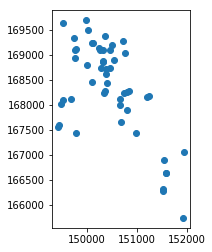

In [16]:
lieux = lieux.to_crs("EPSG:31370")
lieux.plot()

In [5]:
def read(url, to_crs="EPSG:31370"):
    df = gpd.read_file(url)
    df = df.to_crs(to_crs)
    return df    

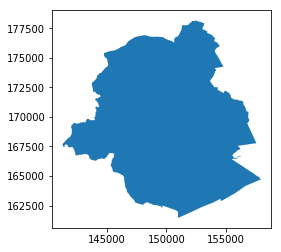

In [6]:
regzone = read("http://geoservices-urbis.irisnet.be/geoserver/Urbis/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=Urbis:Re&outputFormat=JSON&srsName=EPSG:4326&maxFeatures=1000&_ga=2.218810009.1065148847.1584461169-1714394335.1575117761")
regzone.plot()

In [7]:
regzone.bounds

,minx,miny,maxx,maxy
0,141192.732116,161464.375965,158005.486751,178169.302663


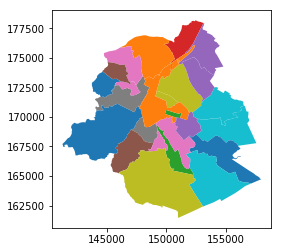

In [31]:
prefzone = read("http://geoservices-urbis.irisnet.be/geoserver/Urbis/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=Urbis:Mz&outputFormat=JSON&srsName=EPSG:4326&maxFeatures=100&_ga=2.214484759.1065148847.1584461169-1714394335.1575117761")
prefzone.plot(column='id')

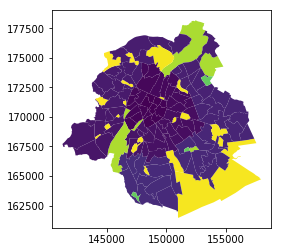

In [42]:
monizone = read("http://geoservices-urbis.irisnet.be/geoserver/Urbis/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=Urbis:Md&outputFormat=JSON&srsName=EPSG:4326&maxFeatures=1000&_ga=2.108638082.1065148847.1584461169-1714394335.1575117761")
monizone.plot(column='MDRC')

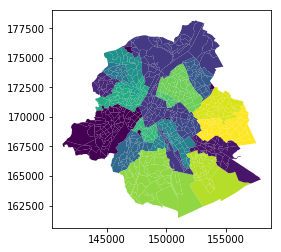

In [40]:
statzone = read("http://geoservices-urbis.irisnet.be/geoserver/Urbis/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=Urbis:Sd&outputFormat=JSON&srsName=EPSG:4326&maxFeatures=1000&_ga=2.212969108.1065148847.1584461169-1714394335.1575117761")
statzone.plot(column='MU_ID')

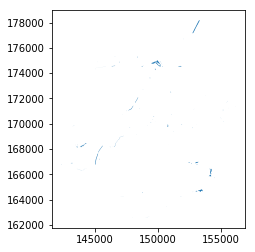

In [11]:
watzone = read("http://geoservices-urbis.irisnet.be/geoserver/Urbis/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=Urbis:ShapeWb&outputFormat=JSON&srsName=EPSG:4326&maxFeatures=100&_ga=2.176923429.1065148847.1584461169-1714394335.1575117761")
watzone.plot()

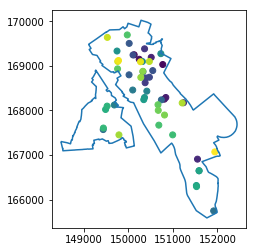

In [45]:
fig, axe = plt.subplots()
prefzone.loc[prefzone.geometry.contains(lieux),:].boundary.plot(ax=axe)
lieux.reset_index().plot(ax=axe, column='index')

In [27]:
zipcode = gpd.sjoin(lieux, prefzone)[['Name', 'geometry', 'MZNC']]
zipcode.sample(5)

,Name,geometry,MZNC
20,Crèche - Les Petits Poneys,POINT Z (151589.464 166645.346 0.000),1050
17,CPAS d'Ixelles,POINT Z (150743.339 168236.836 0.000),1050
3,ASBL - Ecole de devoirs L'Aulne,POINT Z (150809.391 168252.387 0.000),1050
27,"Ecole - Ecole n°5 (m, p)",POINT Z (150364.350 168289.887 0.000),1050
41,Maison médicale - Couleurs Santé,POINT Z (150813.783 167896.675 0.000),1050
